In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.drop(columns=["Id"],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
from sklearn.metrics import confusion_matrix

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
x = df.iloc[:,:4].values
y = df.iloc[:,4].values

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [21]:
model.fit(x_train,y_train)

GaussianNB()

In [22]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype='<U15')

In [23]:
list(zip(y_test,y_pred))

[('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-virginica', 'Iris-virginica'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris-versicolor'),
 ('Iris-setosa', 'Iris-setosa'),
 ('Iris-versicolor', 'Iris

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 12]])

In [27]:
truePred = cm[0][0] + cm[1][1] + cm[2][2]
falsePred = cm[0][1] + cm[0][2] + cm[1][0] + cm[1][2] + cm[2][0] + cm[2][1]

In [28]:
truePred / (falsePred + truePred)

1.0

In [29]:
falsePred/ (falsePred + truePred)

0.0

In [30]:
from sklearn.metrics import precision_score

In [31]:
precision_score(y_pred=y_pred,y_true=y_test,average=None)

array([1., 1., 1.])

In [32]:
from sklearn.metrics import recall_score


In [33]:
recall_score(y_pred=y_pred,y_true=y_test,average=None)

array([1., 1., 1.])

In [34]:
from sklearn.metrics import multilabel_confusion_matrix


In [35]:
multilabel_confusion_matrix(y_true=y_test,y_pred=y_pred,labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


array([[[27,  0],
        [ 0, 11]],

       [[23,  0],
        [ 0, 15]],

       [[26,  0],
        [ 0, 12]]])

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

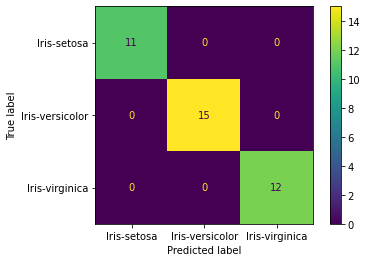

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()